In [2]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import numpy as np
import pandas as pd

#importing matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)


In [3]:
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')
#drop the null values
data_BM = data_BM.dropna(how="any")
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### 1. Creating basic plots
let's have a look can you create some basic plots in seaborn in a single line for which multiple lines were required in matplotlib

In [4]:
# Creating a new feature - multiply item visibility by 100 to increase size
data_BM["Visibility_Scaled"] = data_BM["Item_Visibility"] * 100
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


In [5]:
data_BM.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Visibility_Scaled            float64
dtype: object

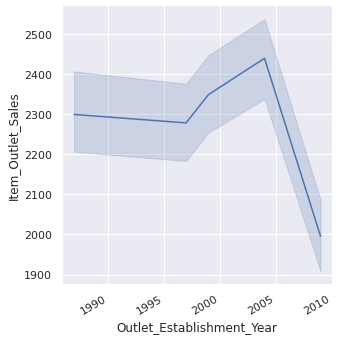

In [6]:
# line
g = sns.relplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", kind="line", data=data_BM)
g.figure.autofmt_xdate()

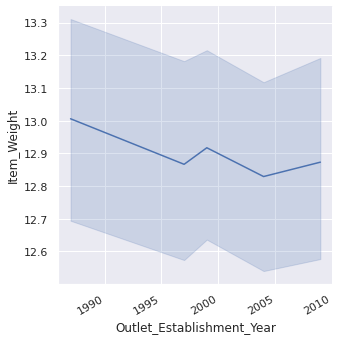

In [7]:
g = sns.relplot(x="Outlet_Establishment_Year", y="Item_Weight", kind="line", data=data_BM)
g.figure.autofmt_xdate()

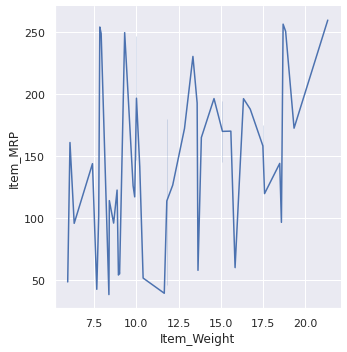

In [8]:
sns.relplot(x="Item_Weight", y="Item_MRP",kind="line", data=data_BM[:50])

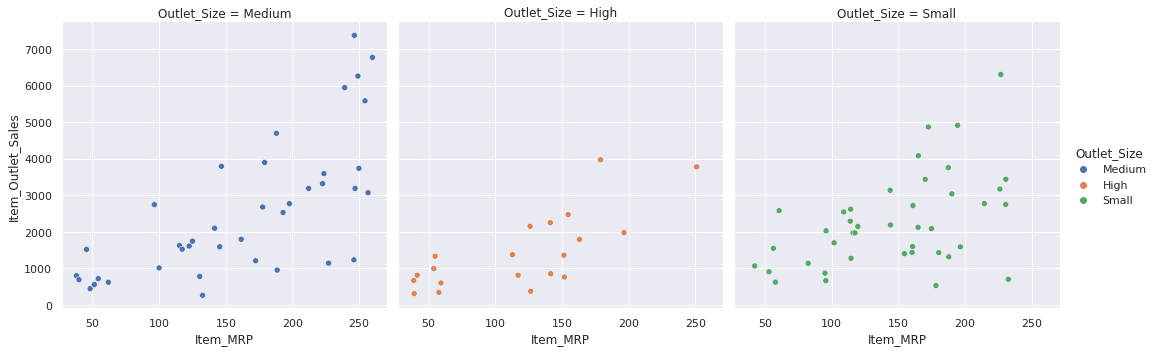

In [11]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Size",
            col="Outlet_Size", data=data_BM[:100]);

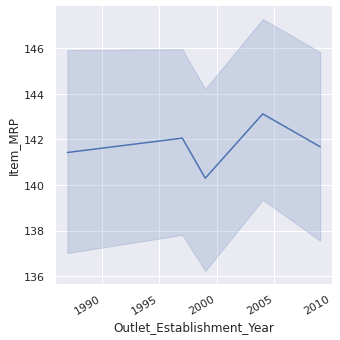

In [10]:
g = sns.relplot(x="Outlet_Establishment_Year", y="Item_MRP", kind="line", data=data_BM)
g.figure.autofmt_xdate()

In [14]:
data_BM.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Visibility_Scaled            float64
dtype: object

In [16]:
data_BM.select_dtypes(exclude=['float64','int64']).dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [18]:
data_BM['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

## Relationship between numerical and categorical variable

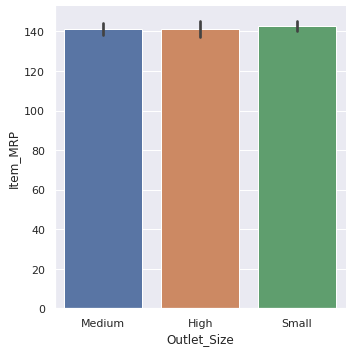

In [29]:
sns.catplot(x="Outlet_Size", y="Item_MRP", kind="bar", data=data_BM)

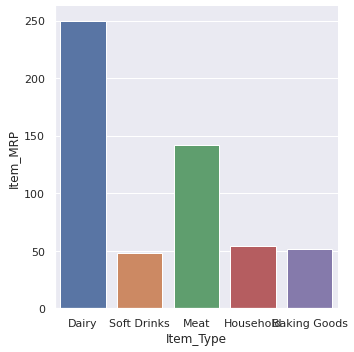

In [27]:
sns.catplot(x="Item_Type", y="Item_MRP", kind='bar', data=data_BM[:5])

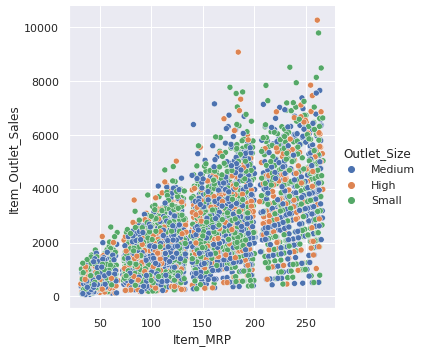

In [34]:
sns.relplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Size',data=data_BM)

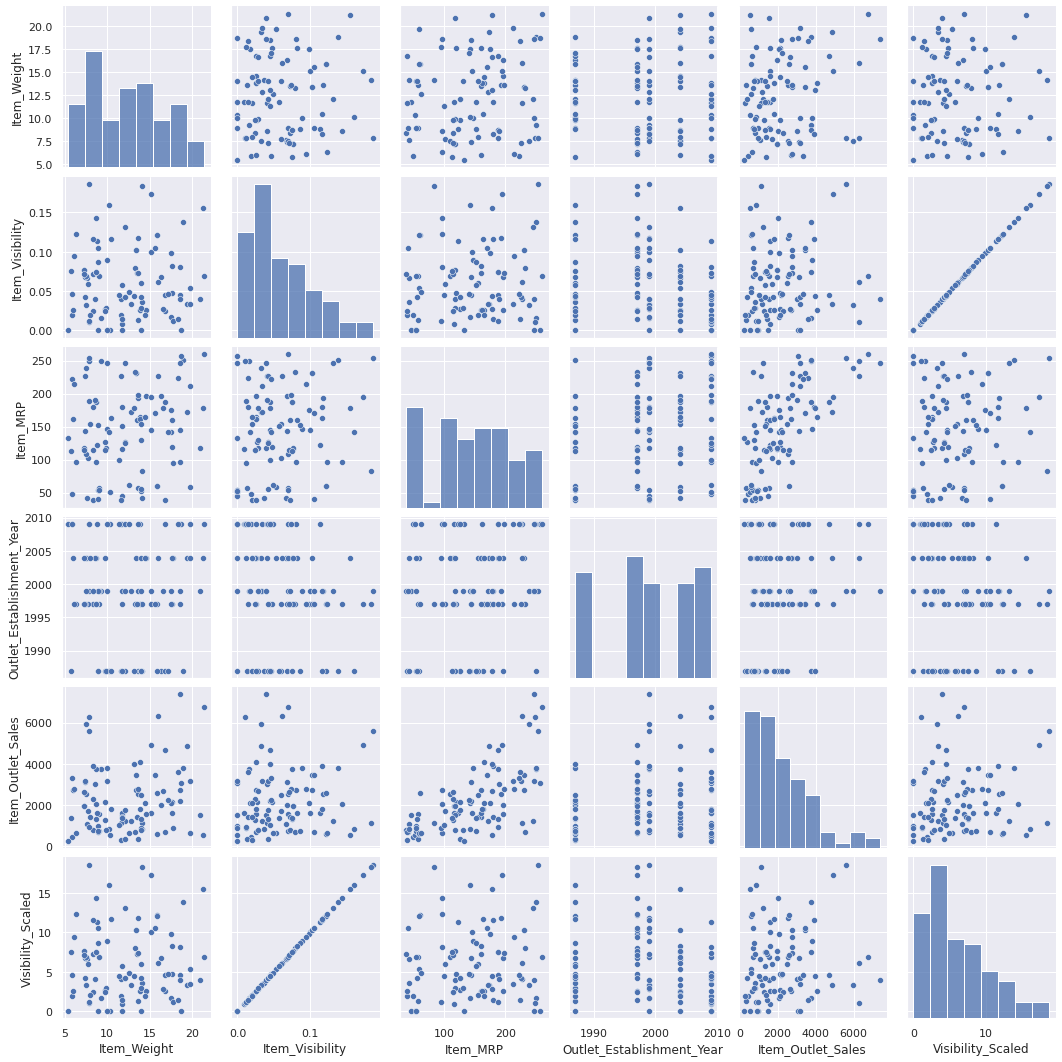

In [35]:
sns.pairplot(data_BM[:100])

<AxesSubplot:ylabel='Density'>

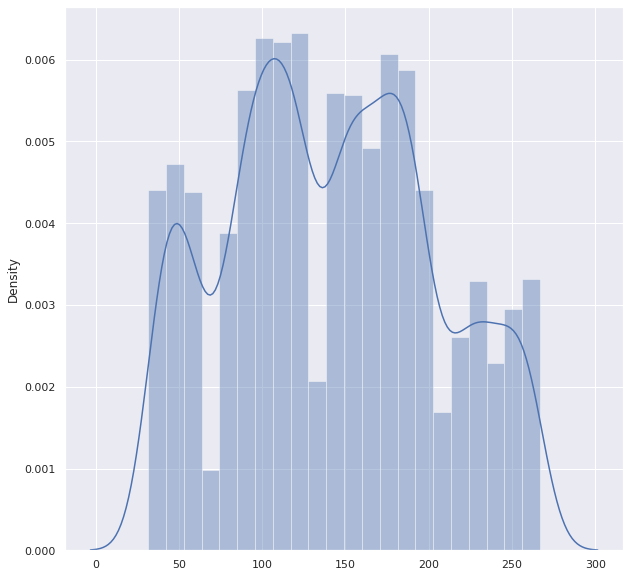

In [45]:
sns.distplot(x=data_BM.Item_MRP)

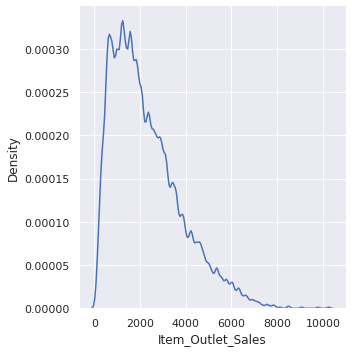

In [50]:
sns.displot(data_BM, x="Item_Outlet_Sales", kind="kde", bw_adjust=.25)


<AxesSubplot:xlabel='Item_Outlet_Sales'>

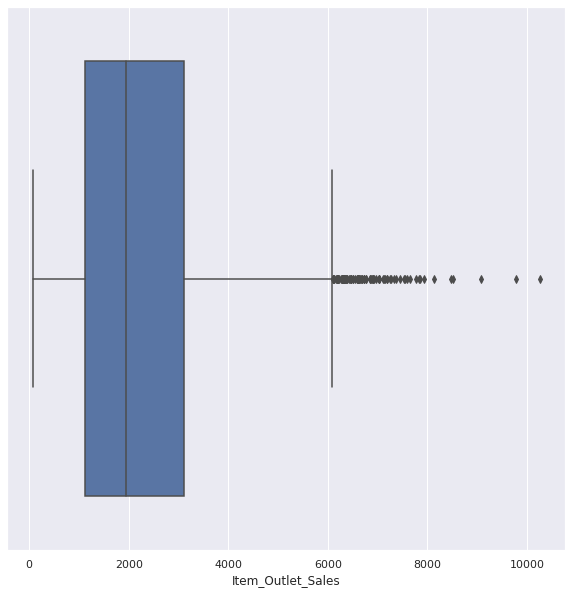

In [48]:
# creating box plot
sns.boxplot(data_BM['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

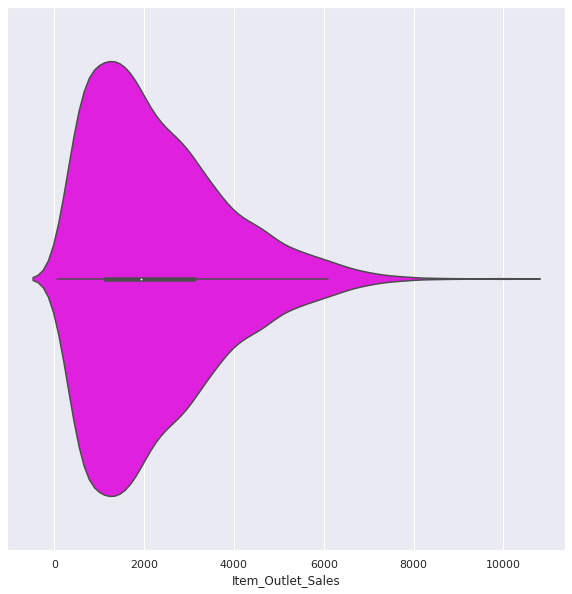

In [49]:
sns.violinplot(data_BM.Item_Outlet_Sales, orient='vertical', color='magenta')

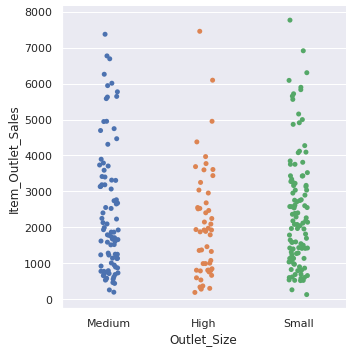

In [51]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='strip', data=data_BM[:250])

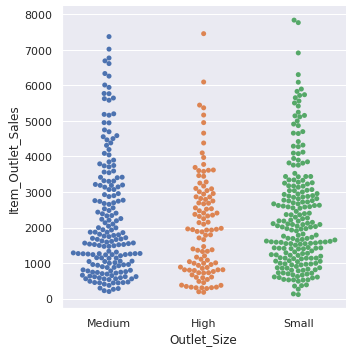

In [54]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='swarm', data=data_BM[:500])

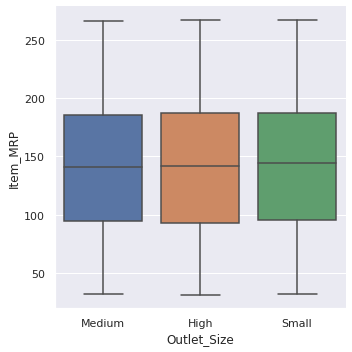

In [55]:
sns.catplot(x="Outlet_Size", y ="Item_MRP", kind="box", data=data_BM)

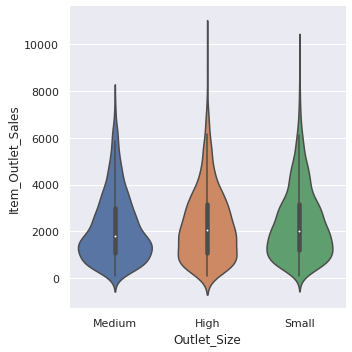

In [56]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind="violin", data=data_BM)

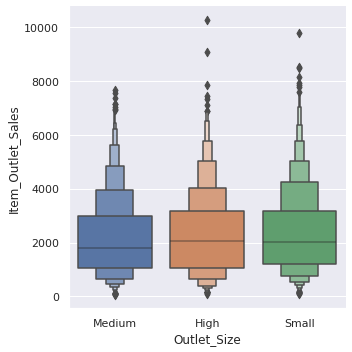

In [57]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="boxen",data=data_BM);

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

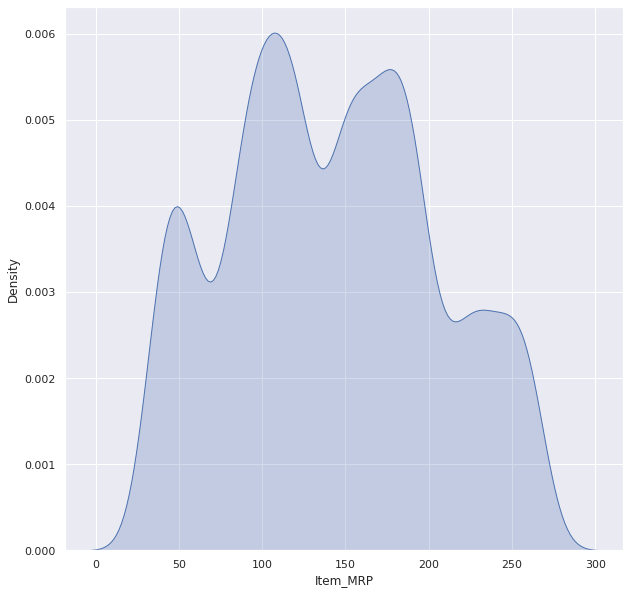

In [61]:
# density estimati0n plot
#plt.figure(figsize=(10,10))
sns.kdeplot(data_BM['Item_MRP'], shade=True)

In [69]:
iris = pd.read_csv("Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
iris.drop("Id", axis=1, inplace=True)

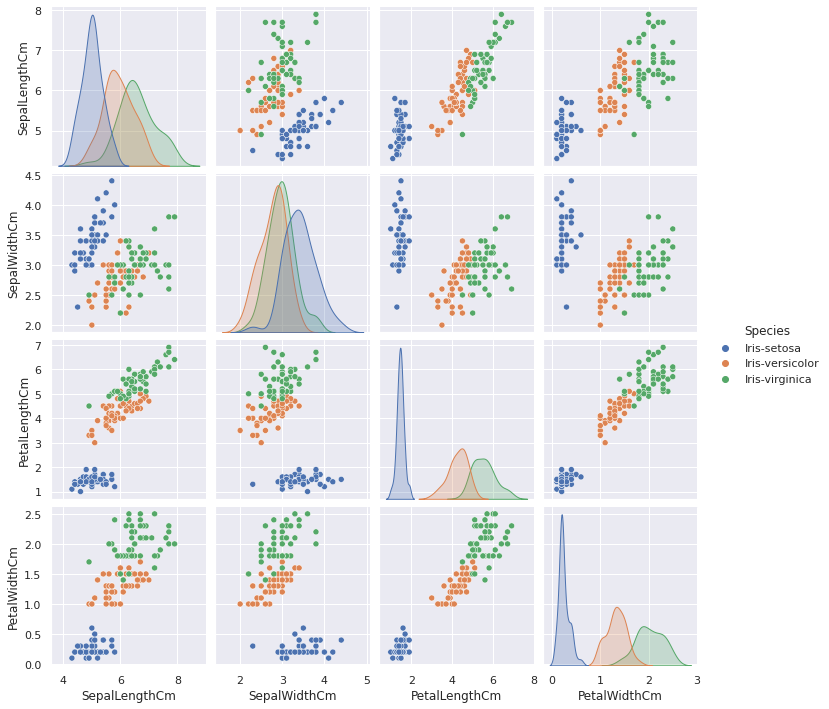

In [71]:
sns.pairplot(iris, hue="Species", height=2.5)